In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nigeria-endsars-tweets/NigeriaEndSars data.csv


In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b1b70d33241160a80ee2ebd015b1d7c0b039ed67d3050f1a01b7d8fc9645cbb9
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob

In [6]:
df = pd.read_csv('../input/nigeria-endsars-tweets/NigeriaEndSars data.csv')

In [7]:
df.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/hurbhiaghelee/status/13852...,2021-04-22 18:28:26+00:00,This is the highest form of intimidation\nWhat...,1385299471123238912,hurbhiaghelee,['https://twitter.com/AmaiweLove/status/138519...,https://twitter.com/AmaiweLove/status/13851900...,['https://t.co/xxdTK0BmQB'],https://t.co/xxdTK0BmQB
1,1,https://twitter.com/AlukoJoseph5/status/138524...,2021-04-22 15:07:05+00:00,Why is it taking a life long time for @MBuhari...,1385248799770267650,AlukoJoseph5,[],NaN,[],NaN
2,2,https://twitter.com/omofuma_Elijah/status/1385...,2021-04-22 10:13:20+00:00,"Even Desmond Elliot is quite , ,,, what is tha...",1385174876428902400,omofuma_Elijah,['https://twitter.com/vhic_tore/status/1385141...,https://twitter.com/vhic_tore/status/138514152...,['https://t.co/RsVQ4N8LwM'],https://t.co/RsVQ4N8LwM
3,3,https://twitter.com/FelixOdohoedi/status/13851...,2021-04-22 09:48:04+00:00,When will CBN freeze the account of @DrIsaPant...,1385168517104869378,FelixOdohoedi,['https://twitter.com/Imudia_se2/status/138495...,https://twitter.com/Imudia_se2/status/13849543...,['https://t.co/r3vxrbkLdn'],https://t.co/r3vxrbkLdn
4,4,https://twitter.com/adekzee1/status/1385164392...,2021-04-22 09:31:40+00:00,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...,1385164392447238145,adekzee1,[],NaN,[],NaN


In [8]:
display(df.columns)
display(df.shape)

Index(['Unnamed: 0', 'url', 'date', 'content', 'id', 'username', 'outlinks',
       'outlinksss', 'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

(9737, 10)

In [9]:
main_df = df[['username', 'content']]
main_df.head()

,username,content
0,hurbhiaghelee,This is the highest form of intimidation\nWhat...
1,AlukoJoseph5,Why is it taking a life long time for @MBuhari...
2,omofuma_Elijah,"Even Desmond Elliot is quite , ,,, what is tha..."
3,FelixOdohoedi,When will CBN freeze the account of @DrIsaPant...
4,adekzee1,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...


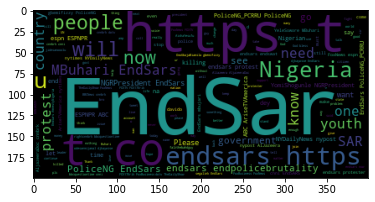

In [10]:
content_str = " ".join(main_df.content)
words = WordCloud().generate(content_str)
plt.imshow(words)
plt.show()

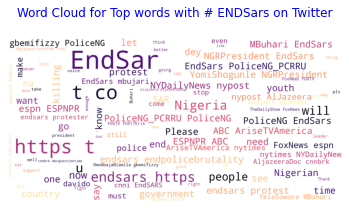

In [11]:
word_cloud = WordCloud(
                    background_color='white',
                    max_words=100,
                    max_font_size=30,
                    scale=5,
                    colormap='magma',
                    random_state=1).generate(content_str)
plt.axis('off')
plt.title('Word Cloud for Top words with # ENDSars on Twitter\n', color='blue')
plt.imshow(word_cloud)
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer


In [13]:
vect = CountVectorizer(max_features=100)
vect.fit(df.content)
X = vect.transform(df.content)
X

<9737x100 sparse matrix of type '<class 'numpy.int64'>'
	with 75279 stored elements in Compressed Sparse Row format>

In [14]:
my_array = X.toarray()
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names_out())
X_df

,about,all,and,are,as,at,be,been,but,by,...,when,who,why,will,with,yelesowore,yomishogunle,you,your,youths
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,1,0,1,0,1,0,1,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,0,0,1,1,1,0,2,0,0,0,...,0,0,0,1,0,0,1,1,0,1
9733,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9734,0,1,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9735,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
vect2 = CountVectorizer(ngram_range=(1,2), max_features=100, min_df=2000)
vect2.fit(df.content)
X2 = vect.transform(df.content)
X2

<9737x100 sparse matrix of type '<class 'numpy.int64'>'
	with 75279 stored elements in Compressed Sparse Row format>

In [16]:
from nltk import word_tokenize

In [17]:
tweet_tokens = [word_tokenize(tweet) for tweet in df.content]
tweet_tokens[555]

['If',
 '@',
 'Sars',
 'never',
 'end',
 'in',
 'your',
 'village',
 ',',
 'go',
 'back',
 'there',
 '.',
 'In',
 'Lagos',
 '@',
 'EndSars',
 'is',
 'over',
 ',',
 'if',
 'you',
 'protest',
 ',',
 'it',
 "'s",
 'at',
 'your',
 'own',
 'risk']

In [18]:
len_tokens = []
for tweet_length in range(len(tweet_tokens)):
    len_tokens.append(len(tweet_tokens[tweet_length]))
    
main_df['tweet_length'] = len_tokens
main_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,username,content,tweet_length
0,hurbhiaghelee,This is the highest form of intimidation\nWhat...,43
1,AlukoJoseph5,Why is it taking a life long time for @MBuhari...,54
2,omofuma_Elijah,"Even Desmond Elliot is quite , ,,, what is tha...",51
3,FelixOdohoedi,When will CBN freeze the account of @DrIsaPant...,58
4,adekzee1,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...,55


In [19]:
from langdetect import detect_langs

In [20]:
main_df.iloc[2684, 1]

'To our fallen heroes\n\n🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️🕯️\n\n@endsars @endswat'

In [21]:
len(main_df)

9737

In [22]:
"""
i couldn't appropriately raise a LangDetectExcetion Error and it was stopping at row 2684
languages = []

for row in range(len(main_df)):
    try:
        languages.append(detect_langs(main_df.iloc[row, 1]))
    except:
        language = "error"
        print("This row throws and error:", main_df[row])

languages = [str(lang).split(':')[0][1:] for lang in languages]
main_df['language'] = languages

main_df.head()
"""


'\ni couldn\'t appropriately raise a LangDetectExcetion Error and it was stopping at row 2684\nlanguages = []\n\nfor row in range(len(main_df)):\n    try:\n        languages.append(detect_langs(main_df.iloc[row, 1]))\n    except:\n        language = "error"\n        print("This row throws and error:", main_df[row])\n\nlanguages = [str(lang).split(\':\')[0][1:] for lang in languages]\nmain_df[\'language\'] = languages\n\nmain_df.head()\n'

In [23]:
"""
#It works but it takes too long to run
def det(x):
    try:
        lang = detect_langs(x)
    except:
        lang = 'Other'
    return lang

main_df['Lang'] = main_df['content'].apply(det)

SyntaxError: EOF while scanning triple-quoted string literal (2107312014.py, line 10)

In [ ]:
main_df['Lang'] = [str(lang).split(':')[0][1:] for lang in main_df['Lang']]
main_df.head()

In [ ]:
main_df.Lang.value_counts()

In [ ]:
sv_tweets = main_df[main_df['Lang']=='sv']
sv_tweets.head()

In [ ]:
sv_tweets.describe()

In [ ]:
languages = []

for row in range(len(main_df)):
    try:
        languages.append(detect_langs(main_df.iloc[row, 1]))
    except:
        language = "error"
        print("This row throws and error:", main_df[row])

#languages = [str(lang).split(':')[0][1:] for lang in languages]
#main_df['language'] = languages

#main_df.head()

In [ ]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
my_stopwords = set(STOPWORDS)
my_stopwords.update(['https', 't', 'u', 'co', 'will', 'now', 'sar', 'one', 'us', 'go', 'see'])

my_cloud = WordCloud(width=800, height=400, background_color='white', stopwords=my_stopwords).generate(content_str)

plt.figure(figsize=(20,10))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
tweet_tokens2 = [word_tokenize(tweet) for tweet in main_df.content]
print(len(tweet_tokens2[0]))
print((tweet_tokens2[0]))

In [ ]:
tweet_tokens3 = [[word for word in item if word.isalpha()] for item in tweet_tokens2]
print(len(tweet_tokens3[0]))
print((tweet_tokens3[0]))

In [ ]:
vect1 = CountVectorizer().fit(main_df.content)
vect.transform(main_df.content)

vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(main_df.content)
vect2.transform(main_df.content)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import time

In [ ]:
""""porter = PorterStemmer()
lemlem = WordNetLemmatizer()

#Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tweet_tokens3.values] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

In [ ]:
#lem_tokens = [lemlem.lemmatize(token) for token in tweet_tokens3]